## CNN ile Nesne Tespiti (CIFAR 10)

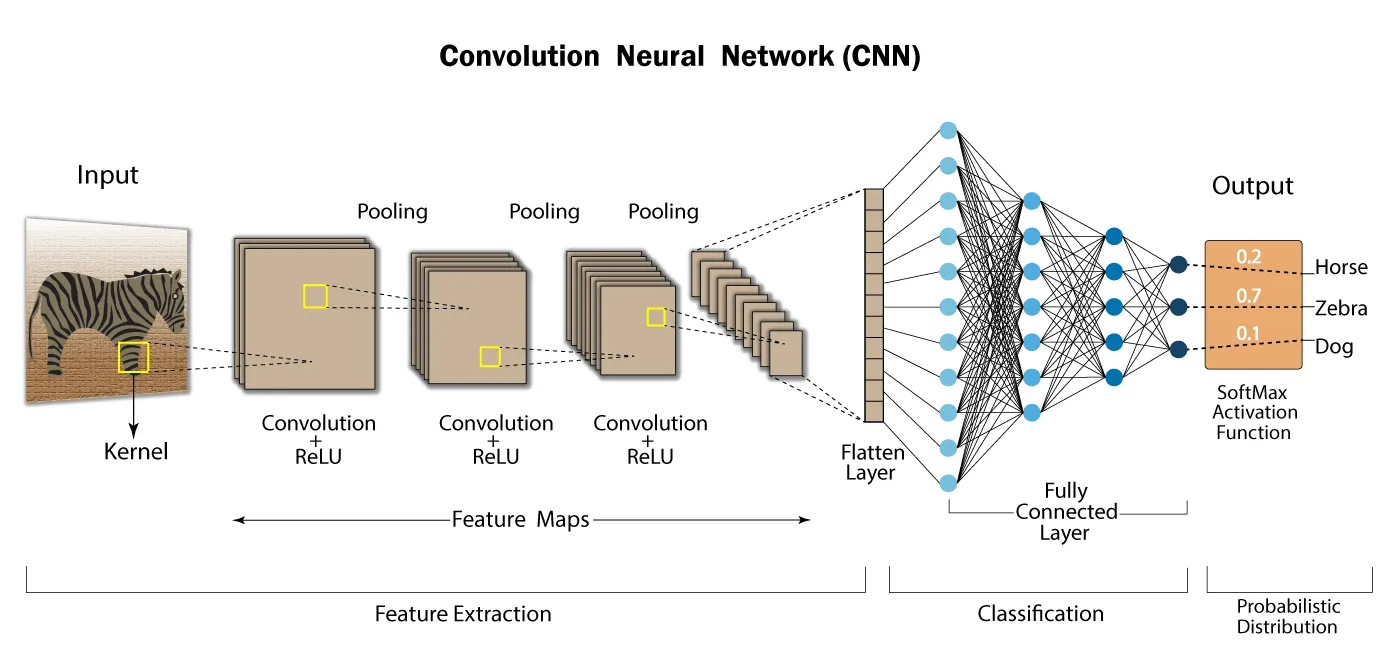![image.png]
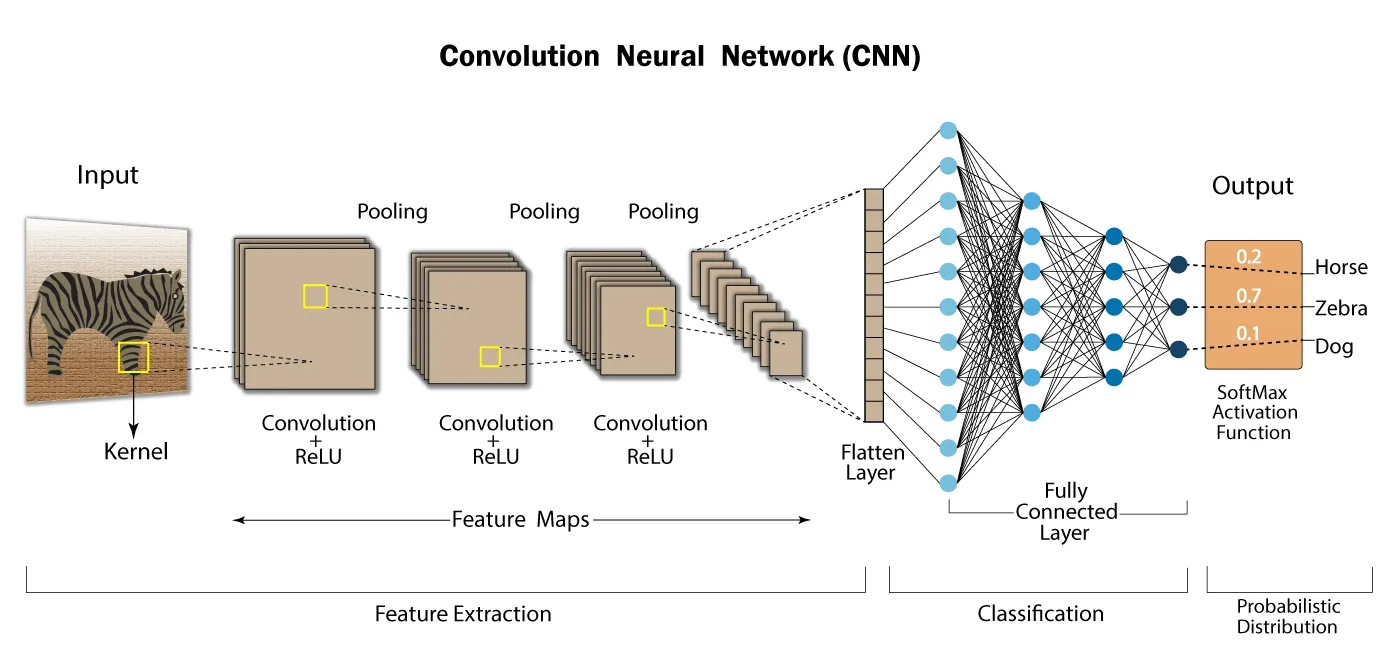

https://medium.com/@learnwithwhiteboard_digest/difference-between-ann-vs-cnn-vs-rnn-ae40269b46e7

In [2]:
import  numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [3]:
class_names = ['uçak', 'otomobil', 'kuş', 'kedi', 'geyik', 
               'köpek', 'kurbağa', 'at', 'gemi', 'kamyon']

In [6]:
 # veri setini yükleme
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [7]:
 # Normalleştirme
x_train=x_train/255.0
x_test=x_test/255.0

In [8]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [10]:
y_train.shape  # iki boyutlu

(50000, 1)

In [11]:
 # tek boyutlu hale getir.
y_train=y_train.flatten()
y_test=y_test.flatten()

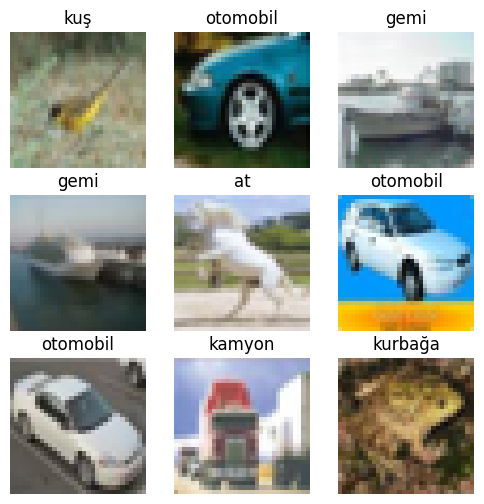

In [13]:
 #GitHub Copilot
import random
fig, axes = plt.subplots(3, 3, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    index = random.randint(0, len(x_train) - 1)
    ax.imshow(x_train[index])
    ax.set_title(class_names[y_train[index]])
    ax.axis('off')
plt.show()

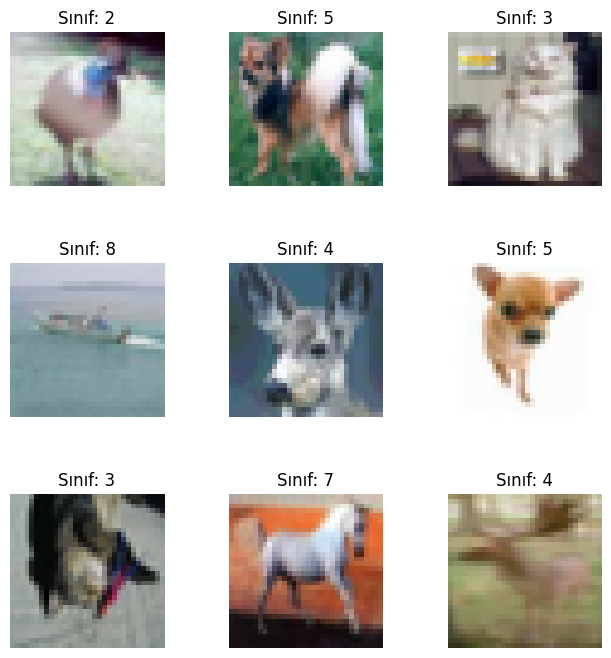

In [14]:
 # deepseek
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
axes = axes.ravel()

# Select 9 unique random indices
indices = np.random.choice(len(x_train), size=9, replace=False)

for i, idx in enumerate(indices):
    img = x_train[idx]
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title('Sınıf: %d' % y_train[idx])

plt.subplots_adjust(hspace=0.5)
plt.show()

In [15]:
 # Derin öğrenme modeli
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

from tensorflow.keras.layers import LeakyReLU

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3)))

model.add(BatchNormalization())

model.add(LeakyReLU(alpha=0.1))

model.add(Conv2D(32, (3, 3)))

model.add(BatchNormalization())

model.add(LeakyReLU(alpha=0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3)))

model.add(BatchNormalization())

model.add(LeakyReLU(alpha=0.1))

model.add(Conv2D(64, (3, 3)))

model.add(BatchNormalization())

model.add(LeakyReLU(alpha=0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3)))

model.add(BatchNormalization())

model.add(LeakyReLU(alpha=0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64))

model.add(BatchNormalization())

model.add(LeakyReLU(alpha=0.1))

model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [16]:
 # modeli derleme
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [23]:
history=model.fit(x_train, y_train,
                 epochs=10,
                 batch_size=128,
                 validation_split=.2)
 # Eğitim sürecinin görselleştirilmesi

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 91s 276ms/step - accuracy: 0.2464 - loss: 2.1703 - val_accuracy: 0.1136 - val_loss: 2.7210
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 139s 269ms/step - accuracy: 0.4380 - loss: 1.5317 - val_accuracy: 0.4992 - val_loss: 1.4427
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 265ms/step - accuracy: 0.5188 - loss: 1.3524 - val_accuracy: 0.5583 - val_loss: 1.2197
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 265ms/step - accuracy: 0.5601 - loss: 1.2462 - val_accuracy: 0.5811 - val_loss: 1.1581
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 265ms/step - accuracy: 0.5947 - loss: 1.1580 - val_accuracy: 0.6325 - val_loss: 1.0535
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 84s 268ms/step - accuracy: 0.6252 - loss: 1.0853 - val_accuracy: 0.6525 - val_loss: 0.9658
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 266ms/step - accuracy: 0.6426 - loss: 1.0329 - val_accuracy: 0.6458 - val_loss: 1.0058
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 85s 271ms/step - accuracy: 0.6560 - loss: 

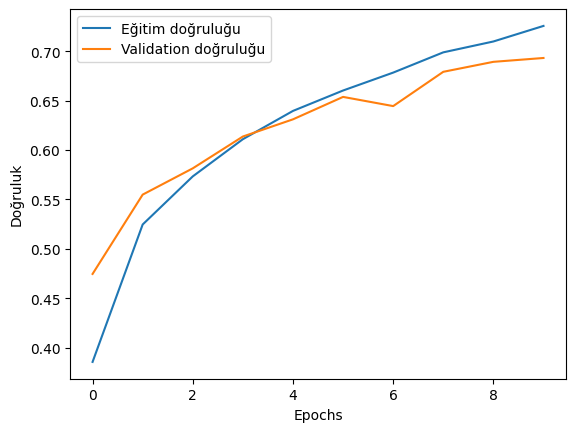

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Eğitim doğruluğu')
plt.plot(history.history['val_accuracy'], label='Validation doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

In [24]:
predict=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


In [27]:
import pandas as pd
tahmin=[]
for pred in predict:
    tahmin.append(np.argmax(pred))


df=pd.DataFrame({'Tahmin':tahmin,
                'Gerçek':y_test})
df

,Tahmin,Gerçek
0,3,3
1,8,8
2,1,8
3,0,0
4,6,6
...,...,...
9995,3,8
9996,6,3
9997,5,5
9998,0,1


In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [31]:
accuracy_score(df.Tahmin,df.Gerçek)

0.6987

<Axes: >

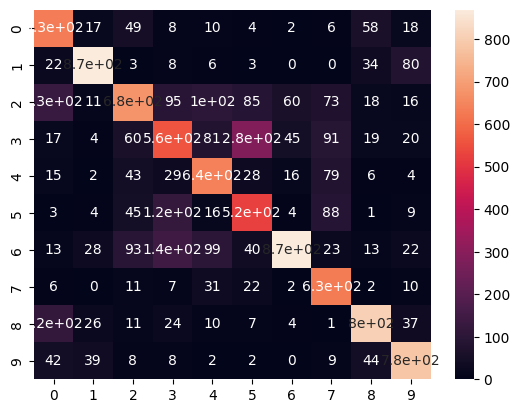

In [34]:
import seaborn as sns
sns.heatmap(confusion_matrix(df.Tahmin,df.Gerçek), annot=True)

In [35]:
class_names

['uçak',
 'otomobil',
 'kuş',
 'kedi',
 'geyik',
 'köpek',
 'kurbağa',
 'at',
 'gemi',
 'kamyon']

In [51]:
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import requests
from PIL import Image
import tempfile
import os
def load_image_safe(file_path):
    if file_path.startswith('http://') or file_path.startswith('https://'):
        try:
            response = requests.get(file_path, stream=True)
            response.raise_for_status()
            with tempfile.NamedTemporaryFile(delete=False, suffix=".jpg") as tmp:
                tmp.write(response.content)
                tmp_path = tmp.name
            img = load_img(tmp_path, target_size=(32, 32))
            os.remove(tmp_path)
            img_array = img_to_array(img)
            img_array = img_array / 255.0  # Normalize
            gorseller.append(img_array)
            print(f"Successfully loaded and preprocessed: {file_path}")
        except Exception as e:
            print(f"Error loading URL {file_path}: {e}")
    else:
        try:
            img = load_img(file_path, target_size=(32, 32))
            img_array = img_to_array(img)
            img_array = img_array / 255.0  # Normalize
            gorseller.append(img_array)
            print(f"Successfully loaded and preprocessed: {file_path}")
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

In [60]:
file_paths = [
    '/kaggle/input/gorseller/KOPEK.JPG',
    '/kaggle/input/uak-foto/kaan.jpg',
    '/kaggle/input/uak-foto/savas ucagi.jpg',
    'https://static.ticimax.cloud/cdn-cgi/image/width=818,quality=85/30548/uploads/urunresimleri/buyuk/lc-oyuncak-kirmizi-mavi-buyuk-kamyon--4404-.jpg',
'/kaggle/input/kediiiii/kedi.jpg'
]

In [61]:
gorseller = []
for file_path in file_paths:
    load_image_safe(file_path)

Successfully loaded and preprocessed: /kaggle/input/gorseller/KOPEK.JPG
Successfully loaded and preprocessed: /kaggle/input/uak-foto/kaan.jpg
Successfully loaded and preprocessed: /kaggle/input/uak-foto/savas ucagi.jpg
Successfully loaded and preprocessed: https://static.ticimax.cloud/cdn-cgi/image/width=818,quality=85/30548/uploads/urunresimleri/buyuk/lc-oyuncak-kirmizi-mavi-buyuk-kamyon--4404-.jpg
Successfully loaded and preprocessed: /kaggle/input/kediiiii/kedi.jpg


In [63]:
if len(gorseller) != 5:
    print("Not all images were loaded successfully.")
else:
    gorseller = np.array(gorseller)

In [64]:
results = model.predict(gorseller)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [65]:
original_images = []
for file_path in file_paths:
    try:
        if file_path.startswith('http://') or file_path.startswith('https://'):
            response = requests.get(file_path, stream=True)
            response.raise_for_status()
            with tempfile.NamedTemporaryFile(delete=False, suffix=".jpg") as tmp:
                tmp.write(response.content)
                tmp_path = tmp.name
            img = Image.open(tmp_path)
            original_images.append(img)
            os.remove(tmp_path)
        else:
            img = Image.open(file_path)
            original_images.append(img)
    except Exception as e:
        print(f"Error loading original image {file_path}: {e}")

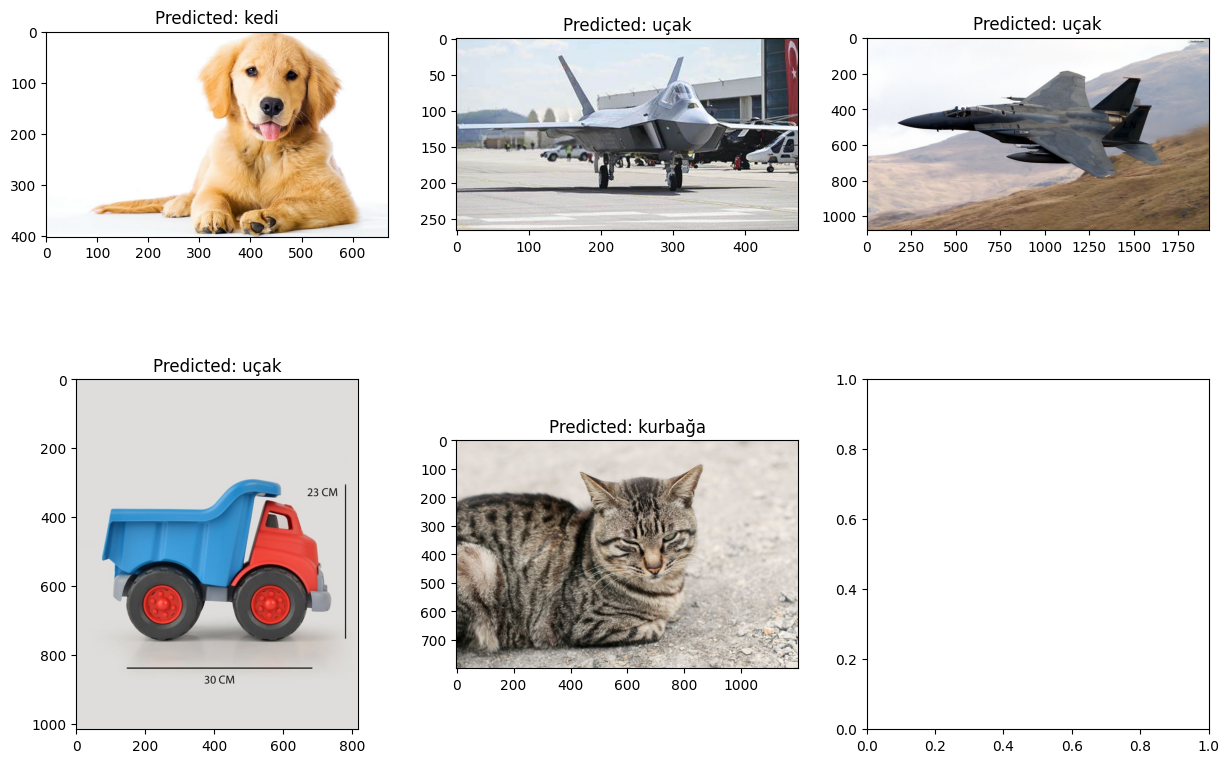

In [68]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

ax[0, 0].imshow(original_images[0])
ax[0, 0].set_title('Predicted: ' + class_names[np.argmax(results[0])])

ax[0, 1].imshow(original_images[1])
ax[0, 1].set_title('Predicted: ' + class_names[np.argmax(results[1])])

ax[0, 2].imshow(original_images[2])
ax[0,2].set_title('Predicted: ' + class_names[np.argmax(results[2])])

ax[1, 0].imshow(original_images[3])
ax[1, 0].set_title('Predicted: ' + class_names[np.argmax(results[3])])

ax[1, 1].imshow(original_images[4])
ax[1, 1].set_title('Predicted: ' + class_names[np.argmax(results[4])])
plt.show()